# **(CNN) Architecture Implementation**

# LeNet-5: Theoretical Overview

LeNet-5 is one of the seminal convolutional neural network (CNN) architectures in the field of deep learning. Developed in the late 1990s, it laid the groundwork for many modern CNN architectures and remains an important reference point in the history of neural networks.

---

## Historical Background

- **Creators:** Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner  
- **Year of Creation:** 1998  
- **Primary Application:** Handwritten digit recognition (notably using the MNIST dataset)  

LeNet-5 was one of the first neural network architectures to successfully utilize convolutional layers, pooling, and fully connected layers to perform image recognition tasks, which revolutionized how visual data is processed.

---

## Architectural Overview

LeNet-5 is composed of a series of layers that progressively extract and process features from the input image. Below is a breakdown of its main components:

### 1. Input Layer
- **Input:** A 32×32 pixel grayscale image.
- **Purpose:** Provides the raw pixel data that the network will process.

### 2. Convolutional Layers (C1 and C3)
- **C1 Layer:**
  - **Operation:** Applies 6 convolutional filters (kernels) of size 5×5.
  - **Activation:** Typically uses a non-linear function such as the hyperbolic tangent (tanh).
  - **Purpose:** Detects basic features (e.g., edges, corners) in the input image.

- **C3 Layer:**
  - **Operation:** Applies 16 convolutional filters of size 5×5.
  - **Connectivity:** May use a partially connected structure (not every filter is connected to all feature maps from the previous layer) to capture more complex patterns.
  - **Purpose:** Extracts more advanced features from the input.

### 3. Subsampling (Pooling) Layers (S2 and S4)
- **Operation:** These layers perform average pooling using a 2×2 window with a stride of 2.
- **Purpose:** Reduces the spatial dimensions of the feature maps, decreasing computational complexity and helping to mitigate overfitting. They also introduce translation invariance to the network.

### 4. Fully Connected Layers (F5 and F6)
- **F5 Layer:**
  - **Operation:** Acts like a fully connected layer with 120 neurons.
  - **Purpose:** Integrates the features learned in previous layers into a high-level representation.

- **F6 Layer:**
  - **Operation:** Contains 84 neurons.
  - **Purpose:** Further refines the high-level features before making the final decision.

### 5. Output Layer
- **Operation:** Produces the final classification, typically using a softmax activation function to output probabilities for each class (e.g., 10 classes for the digits 0–9).
- **Purpose:** Assigns the input image to one of the predefined classes based on the learned features.

---

## Uses and Significance

- **Handwritten Digit Recognition:**  
  Originally designed to recognize handwritten digits, LeNet-5 achieved remarkable performance on the MNIST dataset, demonstrating the power of CNNs.

- **Foundation for Modern CNNs:**  
  Its architecture has influenced many subsequent CNN designs such as AlexNet, VGG, and ResNet, which have further advanced the field of computer vision.

- **Educational Impact:**  
  Due to its relatively simple and effective design, LeNet-5 is frequently used as an introductory example in deep learning courses, making it a valuable educational tool.

---

## Conclusion

LeNet-5 stands as a pioneering model in the evolution of neural networks. Its innovative use of convolutional and pooling layers for feature extraction and classification not only addressed the challenges of image recognition in its time but also provided a blueprint for future advancements in deep learning. Understanding LeNet-5 offers insight into the foundational concepts that continue to underpin modern computer vision systems.


# Simplified Explanation of LeNet-5 Architecture

LeNet-5 is one of the pioneering convolutional neural networks designed for image recognition. It processes a **32x32 grayscale image** through several layers to extract features and classify the image. Below is a simple diagram and explanation of its key components.

![Diagram from Google Drive](https://drive.google.com/uc?export=view&id=1IxbcNTdegpWz_1FlA9nXrkKMC122GHd5)



---

## Layer-by-Layer Explanation

1. **Input Layer (32x32)**
   - **What it is:** A 32x32 pixel grayscale image.
   - **Purpose:** Supplies the raw pixel data for processing.

2. **Convolutional Layer (C1)**
   - **Configuration:** 6 filters, each with a 5x5 kernel.
   - **Operation:** Scans the input image to detect basic features (like edges and corners).
   - **Result:** Produces 6 feature maps that emphasize simple patterns in the image.

3. **Pooling Layer (S2)**
   - **Configuration:** Average pooling with a 2x2 window.
   - **Operation:** Downsamples the feature maps by taking the average of every 2x2 region.
   - **Result:** Reduces the spatial size of the feature maps while retaining essential information.

4. **Convolutional Layer (C3)**
   - **Configuration:** 16 filters with a 5x5 kernel.
   - **Operation:** Combines features from the previous layer to detect more complex patterns.
   - **Result:** Produces 16 detailed feature maps.

5. **Pooling Layer (S4)**
   - **Configuration:** Average pooling with a 2x2 window.
   - **Operation:** Further downsamples the feature maps.
   - **Result:** Generates smaller feature maps that still capture important details.

6. **Fully Connected Layers (F5 & F6)**
   - **F5 Layer:**  
     - **Configuration:** 120 neurons.
     - **Operation:** Flattens the pooled features and learns high-level combinations.
   - **F6 Layer:**  
     - **Configuration:** 84 neurons.
     - **Operation:** Refines the feature representation before final classification.

7. **Output Layer**
   - **Configuration:** Typically 10 neurons for 10 classes (e.g., digits 0–9).
   - **Operation:** Uses a softmax function to produce a probability distribution over the classes.
   - **Result:** Determines the most likely class for the input image.

---

## Summary

- **Input:** 32x32 grayscale image.
- **Convolution & Pooling Layers:** Extract and reduce the dimensions of features.
- **Fully Connected Layers:** Integrate features and perform high-level reasoning.
- **Output:** Provides a class prediction via softmax activation.

LeNet-5's architecture, though simple, was a breakthrough in using convolutional and pooling layers to automatically learn features from images. This laid the foundation for many modern deep learning models in computer vision.







**importing necessary libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import  mnist
from keras.layers import  Dense , Flatten , Conv2D , AveragePooling2D , Activation , Dropout , MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization


In [2]:
(X_train , y_train) , (X_test , y_test)=mnist.load_data() #spliting mnist dataset into train-test-split

In [3]:
X_train.shape,X_test.shape  #no of input pixels  28x28

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape,y_test.shape

((60000,), (10000,))

### **Lets reshape data and add grayscale channel, which represented as 1.**

In [5]:
X_train=X_train.reshape(X_train.shape[0] , 28,28,1)
X_test=X_test.reshape(X_test.shape[0] , 28,28,1)
X_train.shape ,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## **Lets Normalize data using min-max-scalar**

In [6]:
#Normalization
X_train=X_train/255
X_test=X_test/255 #min max 0-1

In [7]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

### **Applying one-hot encoding on multi-class classifiction problems**





In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# **Model Training**

### **Adding Lenet5 Layers**

In [9]:
model=Sequential()
model.add(Conv2D(6 , kernel_size=(5,5) , padding="valid" , activation="tanh" , input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2 , padding="valid"))

model.add(Conv2D(16 , kernel_size=(5,5) , padding="valid" , activation="tanh"))
model.add(AveragePooling2D(pool_size=(2,2) ,strides=2 , padding="valid"))

model.add(Flatten())
model.add(Dense(120 , activation="tanh"))
model.add(Dense(82, activation="tanh"))
model.add(Dense(10 , activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 82)                  │           9,922 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             830 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,164 (172.52 KB)

 Trainable params: 44,164 (172.52 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss=keras.metrics.categorical_crossentropy , optimizer="adam" , metrics=["accuracy"])

In [12]:
model.fit(X_train , y_train , epochs=10 , batch_size=128,verbose=1 , validation_data=(X_test ,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.8144 - loss: 0.6488 - val_accuracy: 0.9536 - val_loss: 0.1561
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 46ms/step - accuracy: 0.9561 - loss: 0.1465 - val_accuracy: 0.9680 - val_loss: 0.1002
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.9719 - loss: 0.0952 - val_accuracy: 0.9770 - val_loss: 0.0730
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9793 - loss: 0.0683 - val_accuracy: 0.9800 - val_loss: 0.0627
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9847 - loss: 0.0516 - val_accuracy: 0.9818 - val_loss: 0.0566
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 46ms/step - accuracy: 0.9874 - loss: 0.0438 - val_accuracy: 0.9821 - val_loss: 0.0510
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.9886 - loss: 0.0379 - val_accuracy: 0.9847 - val_loss: 0.0463
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9893 - loss: 0.0335 - 

In [13]:
score=model.evaluate(X_test , y_test)
print(score)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9837 - loss: 0.0518
[0.046040453016757965, 0.9848999977111816]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


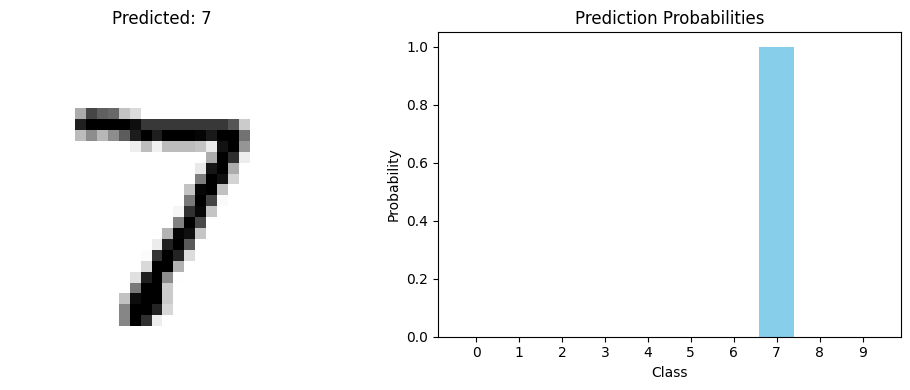

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


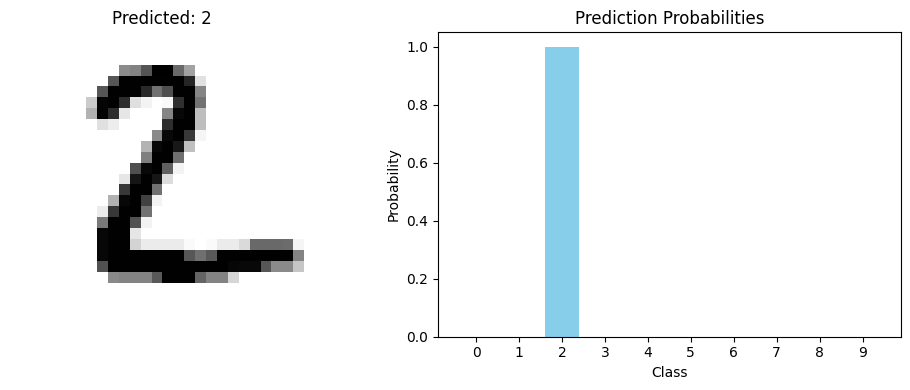

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


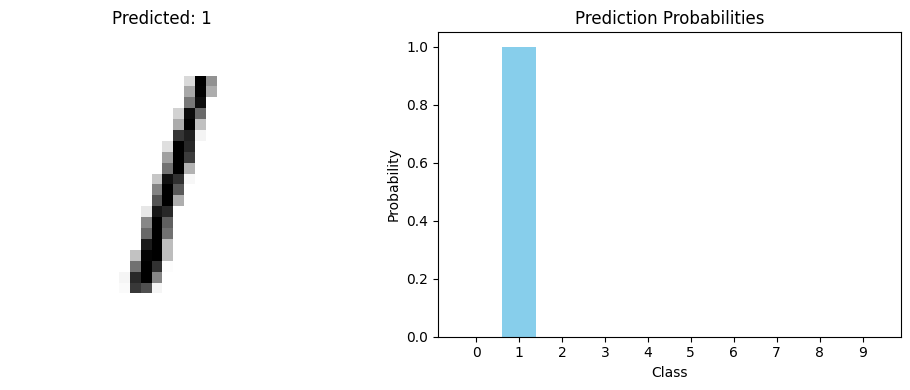

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


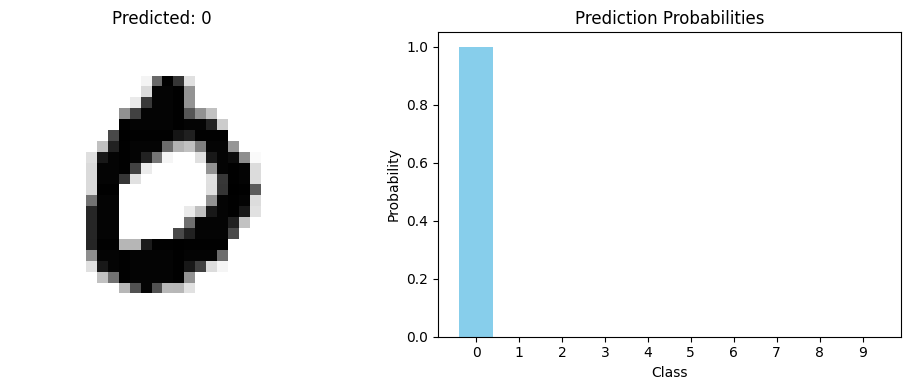

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


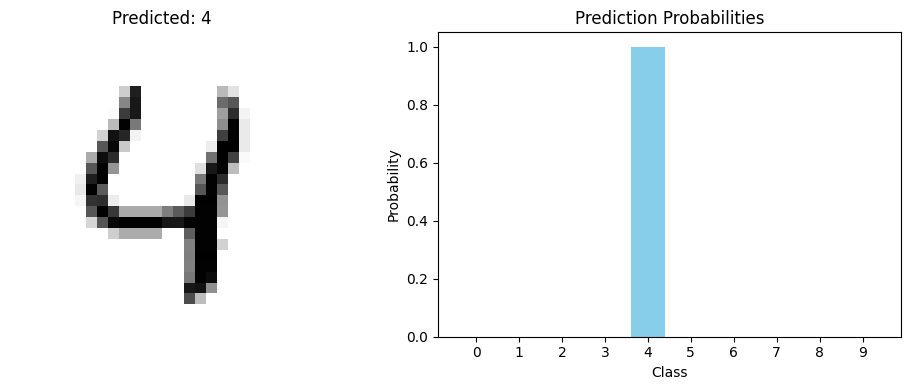

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


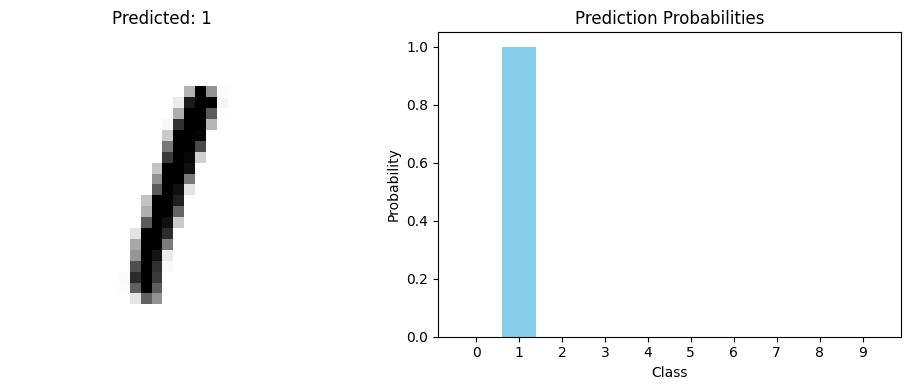

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


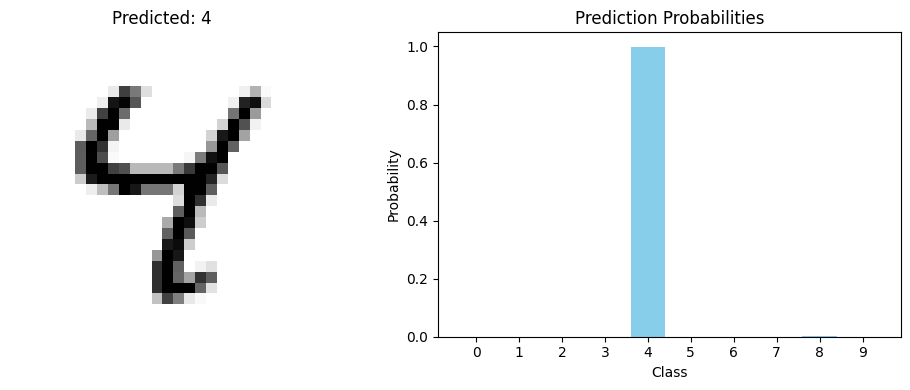

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


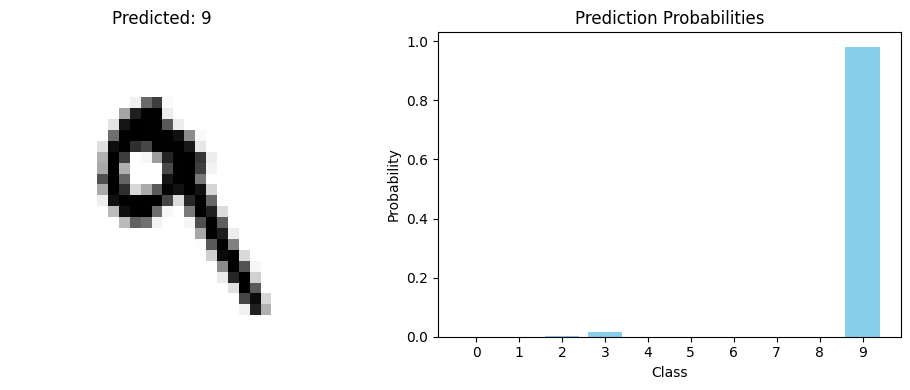

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


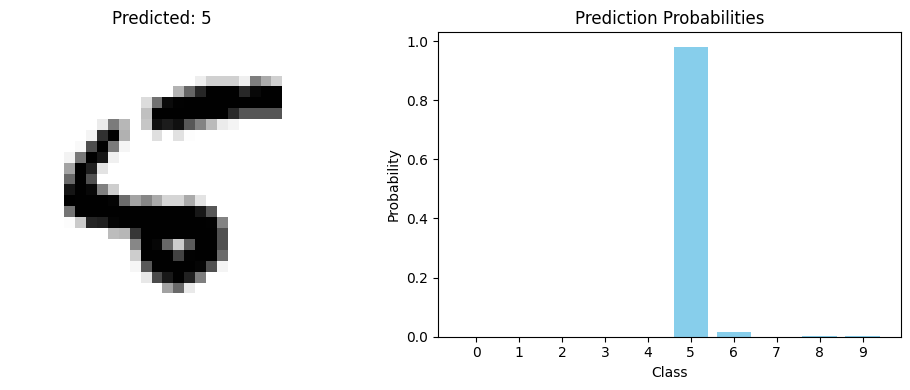

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


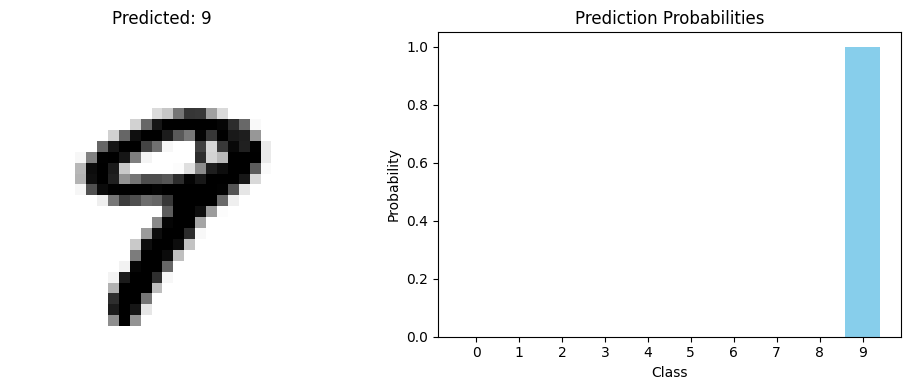

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


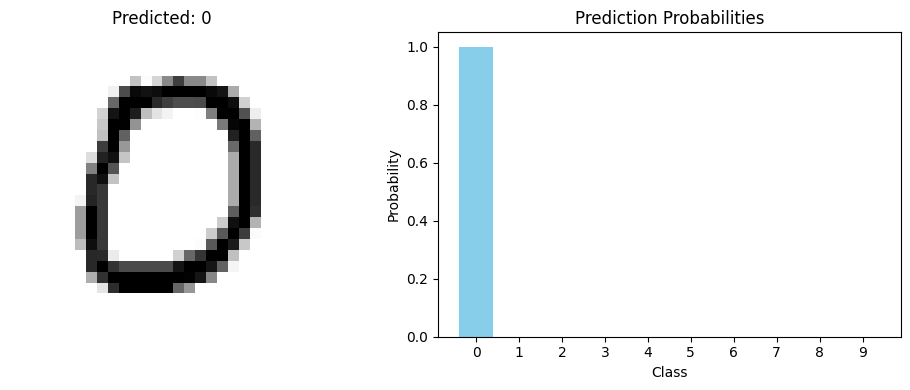

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


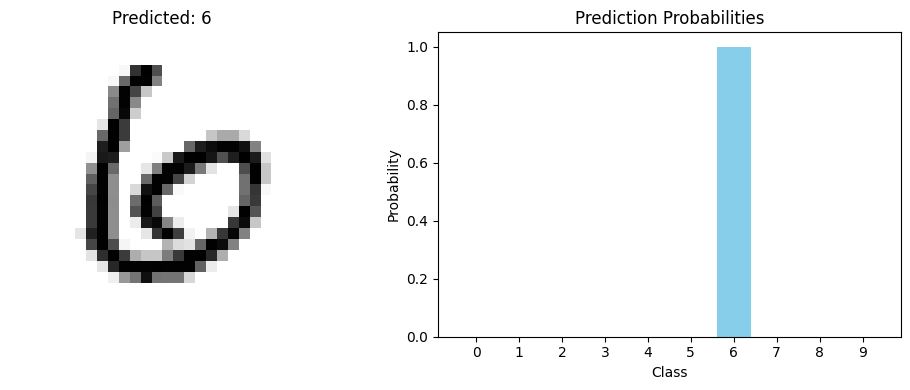

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


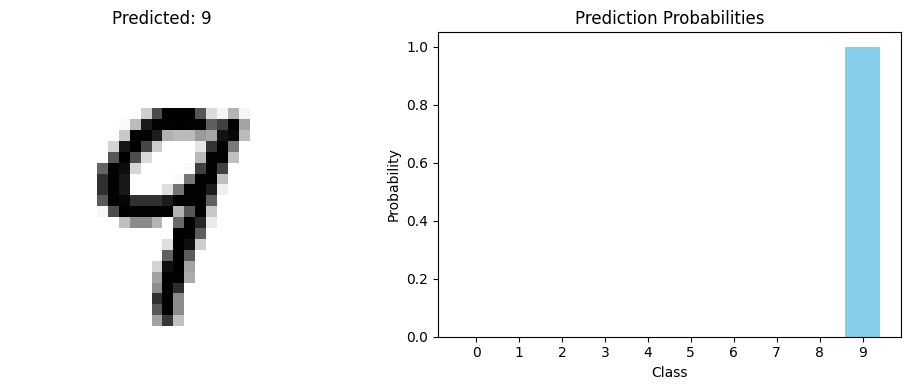

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


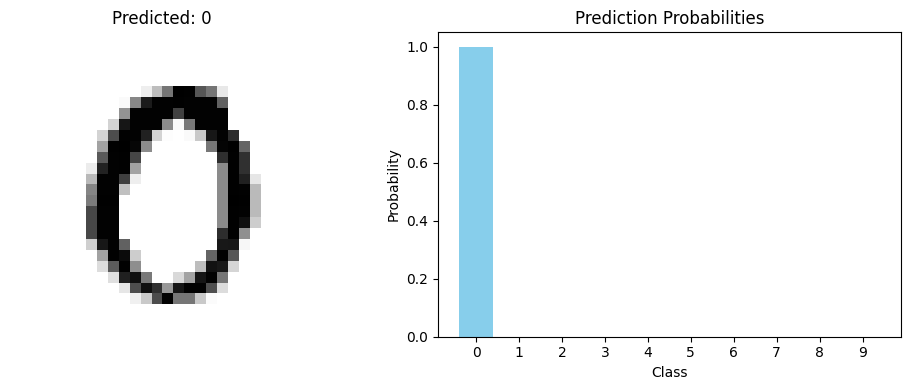

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


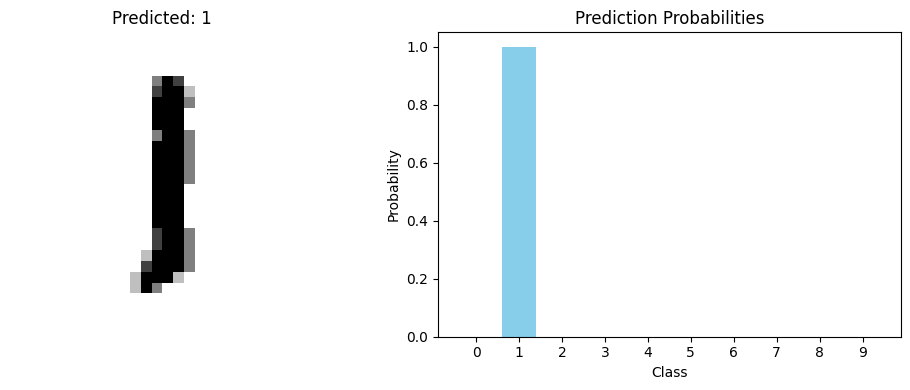

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


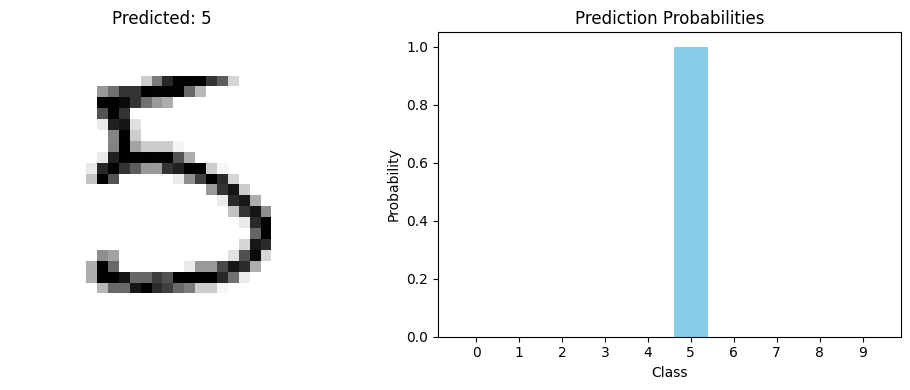

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


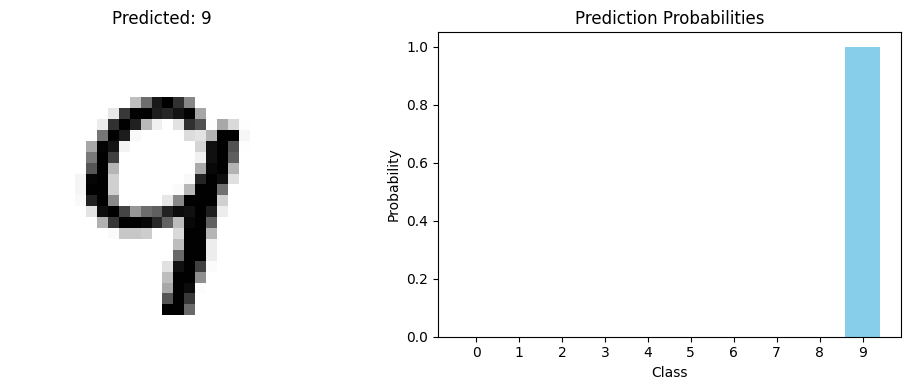

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


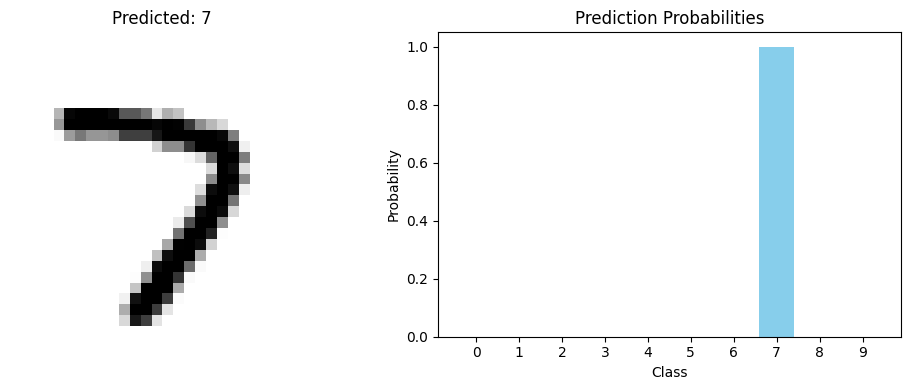

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


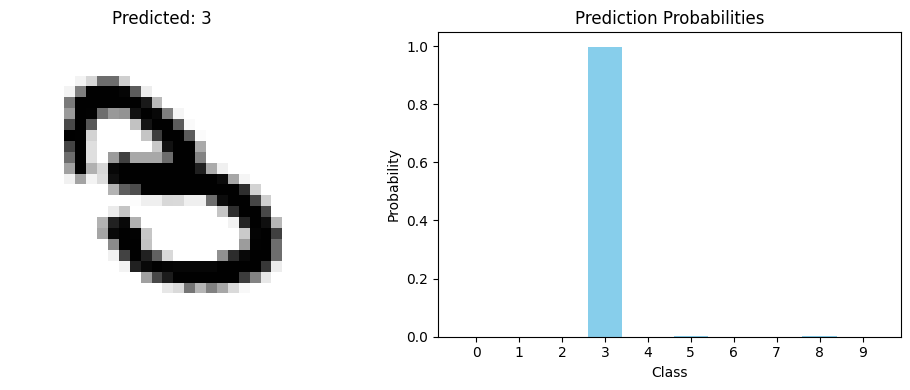

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


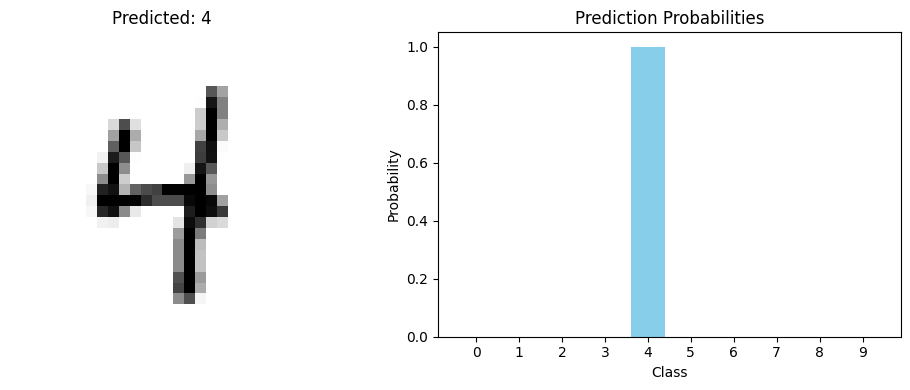

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Number of images you want to visualize
num_images = 20

for i in range(num_images):
    # Get the i-th test image
    img = X_test[i]

    # Convert the single image to a batch format (add batch dimension)
    img_batch = np.expand_dims(img, axis=0)

    # Predict probability distribution for the image
    y_proba = model.predict(img_batch)[0]  # Assuming model.predict returns a batch of predictions
    predicted_class = np.argmax(y_proba)

    # Create a figure with two subplots:
    # Left subplot for the image and right subplot for the probability distribution bar chart.
    fig, (ax_img, ax_bar) = plt.subplots(1, 2, figsize=(10, 4))

    # --- Left: Display the Image ---
    ax_img.imshow(img, cmap="binary")
    ax_img.axis("off")
    ax_img.set_title(f'Predicted: {predicted_class}')

    # --- Right: Display the Prediction Probabilities ---
    classes = np.arange(len(y_proba))  # Create a list of class indices
    ax_bar.bar(classes, y_proba, color="skyblue")
    ax_bar.set_xticks(classes)
    ax_bar.set_xlabel("Class")
    ax_bar.set_ylabel("Probability")
    ax_bar.set_title("Prediction Probabilities")

    # Adjust layout and show the figure
    plt.tight_layout()
    plt.show()


### **Lenet5  Architectures are good for Handwritten Images like Mnist  data**

**Model is Predicting very well**

# AlexNet: A Detailed Explanation with Example

AlexNet is a pioneering deep convolutional neural network that dramatically improved image classification performance in the 2012 ImageNet competition. Developed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton, AlexNet introduced key innovations such as the use of ReLU activations, dropout for regularization, and GPU acceleration for training. Its success sparked widespread interest in deep learning and convolutional neural networks.

---
![Diagram from Google Drive](https://drive.google.com/uc?export=view&id=1fa0ajklDoHkQ_g7O5SeygfB9iySegY00)



## Architectural Overview

AlexNet's architecture can be summarized in several stages:

1. **Input Layer**  
   - **Input:** An RGB image of size **227×227×3**.

2. **Convolutional Layers & Pooling**  
   - **Layer 1:**  
     - **Operation:** Convolution with 96 filters of size **11×11**, stride 4.
     - **Activation:** ReLU.
     - **Normalization & Pooling:** Batch Normalization (in our example, replacing the original Local Response Normalization) and Max Pooling with a **3×3** window, stride 2.
   
   - **Layer 2:**  
     - **Operation:** Convolution with 256 filters of size **5×5** with padding, ReLU activation.
     - **Normalization & Pooling:** Batch Normalization and Max Pooling.
   
   - **Layer 3:**  
     - **Operation:** Convolution with 384 filters of size **3×3** with padding, ReLU activation.
   
   - **Layer 4:**  
     - **Operation:** Convolution with 384 filters of size **3×3** with padding, ReLU activation.
   
   - **Layer 5:**  
     - **Operation:** Convolution with 256 filters of size **3×3** with padding, ReLU activation.
     - **Pooling:** Max Pooling to further reduce spatial dimensions.

3. **Fully Connected Layers**  
   - **Flatten:** Converts feature maps into a one-dimensional vector.
   - **FC Layer 1:** 4096 neurons, ReLU activation, with dropout for regularization.
   - **FC Layer 2:** 4096 neurons, ReLU activation, with dropout.
   - **Output Layer:** 1000 neurons (for ImageNet classification) with softmax activation.

### High-Level Diagram



**Oxflower17 Dataset** : `https://drive.google.com/file/d/1yKwVD5aaDlUaikO4dc0YoseY9JPH_sEJ/view?usp=drive_link`

In [15]:
!ls /content/


my_dir	oxflower17  oxflower17.zip  sample_data  tuner_results


## **Importing Oxflower Dataset**

In [16]:
import gdown
import zipfile
import os

# Google Drive file ID (Extract from the link)
file_id = "1yKwVD5aaDlUaikO4dc0YoseY9JPH_sEJ"
zip_path = "/content/oxflower17.zip"  # Local zip file path
extract_path = "/content/oxflower17"  # Extracted folder path

# Download file from Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", zip_path, quiet=False)

# Create extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Downloading...
From (original): https://drive.google.com/uc?id=1yKwVD5aaDlUaikO4dc0YoseY9JPH_sEJ
From (redirected): https://drive.google.com/uc?id=1yKwVD5aaDlUaikO4dc0YoseY9JPH_sEJ&confirm=t&uuid=588ef0a4-dd4b-4b8b-ae6b-6caef97dd619
To: /content/oxflower17.zip
100%|██████████| 250M/250M [00:01<00:00, 172MB/s]


Dataset extracted successfully!


### **Reading .npz file**

In [17]:
import numpy as np

# Load the dataset
data = np.load("/content/oxflower17/oxflower17.npz")

# Extract X (features) and Y (labels)
X = data["X"]  # Images
Y = data["Y"]  # Labels

print(f"Dataset Loaded! X shape: {X.shape}, Y shape: {Y.shape}")


Dataset Loaded! X shape: (1360, 224, 224, 3), Y shape: (1360, 17)


### **class is encoded in a dummies(one-hot-encoded) format**



In [18]:
Y

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

### **Applying Alexnet Layers**

In [19]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())



# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch NormalisationA
model.add(BatchNormalization())


# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))


# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())


# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 54, 54, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10, 10, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 10, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8, 8, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │              

 Total params: 24,834,833 (94.74 MB)

 Trainable params: 24,815,697 (94.66 MB)

 Non-trainable params: 19,136 (74.75 KB)

In [20]:
# Compile
opt = tf.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [21]:
# Train
model.fit(X, Y, batch_size=64, epochs=5, verbose=1,validation_split=0.2, shuffle=True)

Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 134s 8s/step - accuracy: 0.0988 - loss: 9.1094 - val_accuracy: 0.0515 - val_loss: 174484.3281
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 127s 7s/step - accuracy: 0.2034 - loss: 6.0522 - val_accuracy: 0.1103 - val_loss: 13448.6953
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 123s 7s/step - accuracy: 0.2564 - loss: 4.7902 - val_accuracy: 0.0515 - val_loss: 1889.3997
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 145s 8s/step - accuracy: 0.3083 - loss: 4.0145 - val_accuracy: 0.1287 - val_loss: 269.7686
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 150s 8s/step - accuracy: 0.3470 - loss: 4.6906 - val_accuracy: 0.0368 - val_loss: 447.9401


## **Acuracy is very low and loss is high**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train ,y_test =train_test_split(X,Y , test_size=0.3)

# **Lets Apply HyperParameter Tuning**

In [24]:
!pip install keras-tuner

In [25]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam


def build_model(hp):
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=hp.Int('conv1_filters', min_value=64, max_value=128, step=32),
                     kernel_size=(11,11), strides=(4,4), padding='valid', input_shape=(224,224,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=hp.Int('conv2_filters', min_value=128, max_value=256, step=64),
                     kernel_size=(5,5), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=hp.Int('conv3_filters', min_value=256, max_value=384, step=64),
                     kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    # 4th Convolutional Layer
    model.add(Conv2D(filters=hp.Int('conv4_filters', min_value=256, max_value=384, step=64),
                     kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    # 5th Convolutional Layer
    model.add(Conv2D(filters=hp.Int('conv5_filters', min_value=128, max_value=256, step=64),
                     kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # Flatten and Dense Layers
    model.add(Flatten())

    # 1st Dense Layer
    model.add(Dense(hp.Int('dense1_units', min_value=1024, max_value=4096, step=1024)))
    model.add(Activation('relu'))
    model.add(Dropout(hp.Float('dropout1', 0.3, 0.5, step=0.1)))
    model.add(BatchNormalization())

    # 2nd Dense Layer
    model.add(Dense(hp.Int('dense2_units', min_value=1024, max_value=4096, step=1024)))
    model.add(Activation('relu'))
    model.add(Dropout(hp.Float('dropout2', 0.3, 0.5, step=0.1)))
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(17, activation='softmax'))

    # Compile Model
    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [26]:
import keras_tuner as kt

# Define the tuner
tuner = kt.Hyperband(
    build_model,  # Function to build the model
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='alexnet',
    project_name='oxflower17'
)

# Define HyperParameter Search Space
from keras_tuner import HyperParameters
hp = HyperParameters()  # ✅ Initialize hp

# Start tuning
tuner.search(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=hp.Int('batch_size', 16, 64, step=3))


Trial 3 Complete [00h 04m 53s]
val_accuracy: 0.06372549384832382

Best val_accuracy So Far: 0.0882352963089943
Total elapsed time: 00h 10m 48s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
96                |64                |conv1_filters
256               |128               |conv2_filters
320               |384               |conv3_filters
320               |320               |conv4_filters
192               |128               |conv5_filters
2048              |2048              |dense1_units
0.4               |0.4               |dropout1
2048              |2048              |dense2_units
0.3               |0.4               |dropout2
1e-05             |1e-05             |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
15/60 ━━━━━━━━━━━━━━━━━━━━ 1:07 2s/step - accur

KeyboardInterrupt: 

# 📝 Why is AlexNet Performing Poorly on OxFlower17?

AlexNet was revolutionary in **2012**, but it is **not ideal** for modern small-scale datasets like **OxFlower17**. Below are key reasons why AlexNet struggles with this dataset:

---

## 🔹 1. Overfitting or Underfitting
- **OxFlower17** has only **1,360 images** (80 per class), whereas AlexNet was designed for **ImageNet** (1.2M images).
- The large number of parameters (**~60M**) in AlexNet makes it prone to **overfitting** on small datasets.
- **Solution**: Use **data augmentation** or **transfer learning** with a pretrained model.

---

## 🔹 2. Learning Rate Issues
- If the **learning rate is too high**, the model may fail to converge properly.
- If it’s **too low**, it may take too long to learn useful patterns.
- **Solution**: Reduce the learning rate (`1e-4` or `1e-5`) and use **learning rate scheduling**.

---

## 🔹 3. Dataset Size & Complexity
- **OxFlower17** is a **small dataset** with **fine-grained classification** (flowers have subtle differences).
- AlexNet lacks **modern feature extraction techniques** like **residual connections** (used in ResNet) or **depth-wise convolutions** (used in EfficientNet).
- **Solution**: Using  more **modern architecture** like **ResNet-50 or EfficientNet**.

---

## 🔹 4. Normalization Issues
- AlexNet expects images to be **normalized** to match ImageNet training:
  ```python
  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


In [33]:
import numpy as np
import matplotlib.pyplot as plt

def show_pixel_values_from_array(X_train, index=0):
    """
    Display an image and print its pixel values from a NumPy array.

    Args:
        X_train (numpy.ndarray): Dataset containing images.
        index (int): Index of the image to visualize.

    Returns:
        None (Displays image & prints pixel values).
    """
    # Get Image from X_train
    img = X_train[index]  # Select Image by Index

    # Print Image Shape & Pixel Values
    print(f"Image Shape: {img.shape}")  # (Height, Width, Channels)
    print("\nPixel Values:")
    print(img)  # Print all pixel values

    # Display Image
    plt.imshow(img.astype(np.uint8))  # Convert to uint8 if needed
    plt.title(f"Image at Index {index}")
    plt.axis("off")  # Hide axes
    plt.show()

    # Show Image as 2D Pixel Values for Each Channel
    if img.ndim == 3 and img.shape[-1] == 3:  # Check if RGB
        for i, color in enumerate(["Red", "Green", "Blue"]):
            plt.figure(figsize=(6, 4))
            plt.imshow(img[:, :, i], cmap="gray")  # Show single-channel grayscale
            plt.title(f"{color} Channel Pixels")
            plt.colorbar()  # Show pixel intensity scale
            plt.show()



Image Shape: (224, 224, 3)

Pixel Values:
[[[0.07058824 0.10980392 0.2627451 ]
  [0.09411765 0.13725491 0.2627451 ]
  [0.04313726 0.08235294 0.17254902]
  ...
  [0.00392157 0.01176471 0.        ]
  [0.00392157 0.01568628 0.        ]
  [0.01176471 0.02352941 0.        ]]

 [[0.10196079 0.14117648 0.27450982]
  [0.08235294 0.12156863 0.23137255]
  [0.02745098 0.06666667 0.13725491]
  ...
  [0.00392157 0.01176471 0.        ]
  [0.00784314 0.01960784 0.        ]
  [0.01568628 0.02745098 0.        ]]

 [[0.12941177 0.16470589 0.2784314 ]
  [0.0627451  0.10196079 0.19215687]
  [0.01568628 0.05098039 0.10980392]
  ...
  [0.00392157 0.01176471 0.        ]
  [0.00784314 0.01960784 0.        ]
  [0.01568628 0.02745098 0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]]

 [[0.         0.         0.     

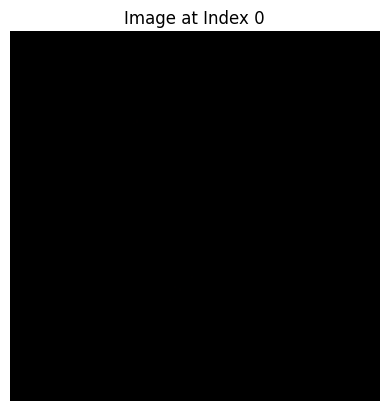

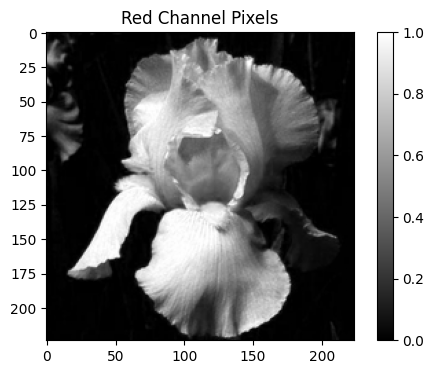

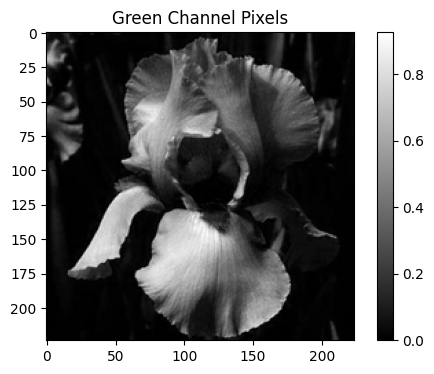

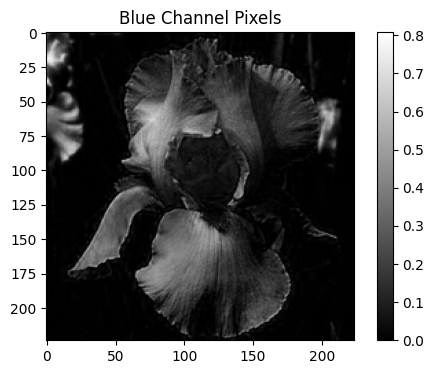

In [35]:
show_pixel_values_from_array(X_train , index=0)